In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#insertion sort function
def insertionSort(arr, n, m):
    numOfComp = 0
    for i in range(n+1, m+1):
        for j in range (i, n, -1):
            numOfComp+=1
            if arr[j] < arr[j-1]:
                temp = arr[j]
                arr[j] = arr[j-1]
                arr[j-1] = temp
            else:
                break
    return numOfComp

In [5]:
# merge function
def merge(arr, n, m):
    mid = (n+m)//2
    if (m-n <= 0):
        return 0

    numOfComp = 0;
    list1, list2 = n, mid+1

    #run while both half of loop not overlapping
    while (list1 <= mid and list2 <= m):
        numOfComp+=1
        #if left sub arrary > right sub array, store right sub array in temp and shift array to the right by 1 element
        if arr[list1] > arr[list2]:
            temp = arr[list2]
            list2+=1
            mid+=1
            for i in range(mid, list1, -1):
                arr[i] = arr[i-1]
            arr[list1] = temp
            list1+=1

        #if left sub array < right subarray, increment start of left sub array
        elif arr[list1] < arr[list2]:
            list1+=1

        #if both sub array elements are equal
        else:
            
            #check if end of list
            if (list1==mid and list2==m):
                break

            #store right subarray element, shift start of left subarray, shift entire array to the right by 1 element, then place temp into sorted array
            temp = arr[list2]
            list2+=1
            list1+=1
            mid+=1
            for i in range(mid, list1, -1):
                arr[i] = arr[i-1]
            arr[list1] = temp
            list1+=1
            
        
    return numOfComp
                
                

# hybrid of mergeSort that uses insertionSort when len of sub array < boundary
def mergeSort(arr, n, m, S):
    #print("\n\n==============\n WHERE AM I %d\n===============\n" % m)
    leftCount = 0
    rightCount = 0
    boundary = S
    mid = (n + m) // 2

    if (m - n) <= 0:
        return 0

    elif (m - n) > 1:

        #use insertion sort if number of elements in this subarray is < boundary
        if (m-n+1) <= boundary:

            """
            print("Number of insertion sort is")
            print(insertionSort(arr, n, m), n , m)
            print("\n\nusing insertionSort()")
            for i in range (n,m+1):
                print(arr[i])
            """
                
            return insertionSort(arr,n,m)
            
        else:
            
            # recursively sort first half
            leftCount = mergeSort(arr, n, mid, boundary)
            
            """
            print("\nusing mergeSort()")
            print("\nList1:")
            for i in range(n, mid+1):
                print(arr[i], end=',')
            print("\n\nnumber of leftCount = ", leftCount, n, m)
            """
            # recursively sort second half
            rightCount = mergeSort(arr, mid + 1, m, boundary)
            """
            print("\n\nList2:")
            for i in range(mid+1, m+1):
                print(arr[i], end=',')
            """
            #merge the 2 lists after recursive calls
            mergeCount = merge(arr, n, m)

            if mergeCount is None:
                mergeCount = 0
            return mergeCount +leftCount+rightCount

            """
            print("\n\nMerged list:")
            for i in range(n, m):
                print(arr[i], end=',')

                
    print("\n\nFull list:")
    for i in range(8):
        print(arr[i],end=',')
            """

In [13]:
def generate_random_datasets(min_size=1000, max_size=1_00_000, step_factor=1.15, max_value=100_000):
    """
    Generate random datasets of integers with increasing sizes.
    
    Parameters:
    min_size (int): Minimum size of the dataset (default: 1000).
    max_size (int): Maximum size of the dataset (default: 10,000,000).
    step_factor (int): Factor by which to increase the dataset size (default: 10).
    max_value (int): Maximum value for the integers in the dataset (default: 100,000).
    
    Returns:
    dict: Dictionary containing datasets with keys as sizes and values as the generated arrays.
    """
    datasets = {}
    
    # Generate datasets of increasing sizes
    size = min_size
    for i in range(15):
        # Generate a random dataset of integers in the range [1, max_value]
        datasets[size] = np.random.randint(1, max_value + 1, size=size)
        print(f"Generated dataset of size {size}")
        
        # Increase the size by the step factor
        size *= step_factor
        size = int(size)
    
    return datasets

# Example usage
random_datasets = generate_random_datasets()


Generated dataset of size 1000
Generated dataset of size 1150
Generated dataset of size 1322
Generated dataset of size 1520
Generated dataset of size 1747
Generated dataset of size 2009
Generated dataset of size 2310
Generated dataset of size 2656
Generated dataset of size 3054
Generated dataset of size 3512
Generated dataset of size 4038
Generated dataset of size 4643
Generated dataset of size 5339
Generated dataset of size 6139
Generated dataset of size 7059


In [64]:
print(mergeSort(random_datasets[1000],0, len(random_datasets[1000])-1, 50))
print(random_datasets[1000])

13417
[  389   466   531   667   669   710   745   956   973  1014  1103  1145
  1165  1226  1248  1337  1380  1405  1493  1582  1593  1646  1823  1928
  1978  2029  2127  2159  2321  2413  2466  2518  2532  2551  2571  2631
  2695  2759  2935  2987  3123  3246  3428  3521  3578  3639  3735  3895
  4068  4146  4171  4236  4341  4553  4636  4707  4800  4997  5210  5248
  5277  5309  5411  5428  5595  5627  5669  5684  5826  5843  6325  6364
  6510  6595  6762  6801  6822  6925  6978  6994  7007  7088  7177  7210
  7256  7436  7507  7510  7630  7718  7914  8023  8125  8256  8257  8262
  8519  8717  8854  8880  8934  8954  9011  9099  9130  9182  9249  9388
  9390  9394  9467  9515  9585  9637  9692  9702  9737  9905  9908  9977
 10094 10323 10694 10767 10827 10886 10954 11027 11403 11780 11784 11934
 11996 12031 12224 12434 12516 12558 12759 12815 12918 12928 13421 13456
 13476 13548 13841 13863 14036 14133 14228 14510 14536 14556 14567 14614
 14616 14622 14679 14756 14826 14847 14867 14

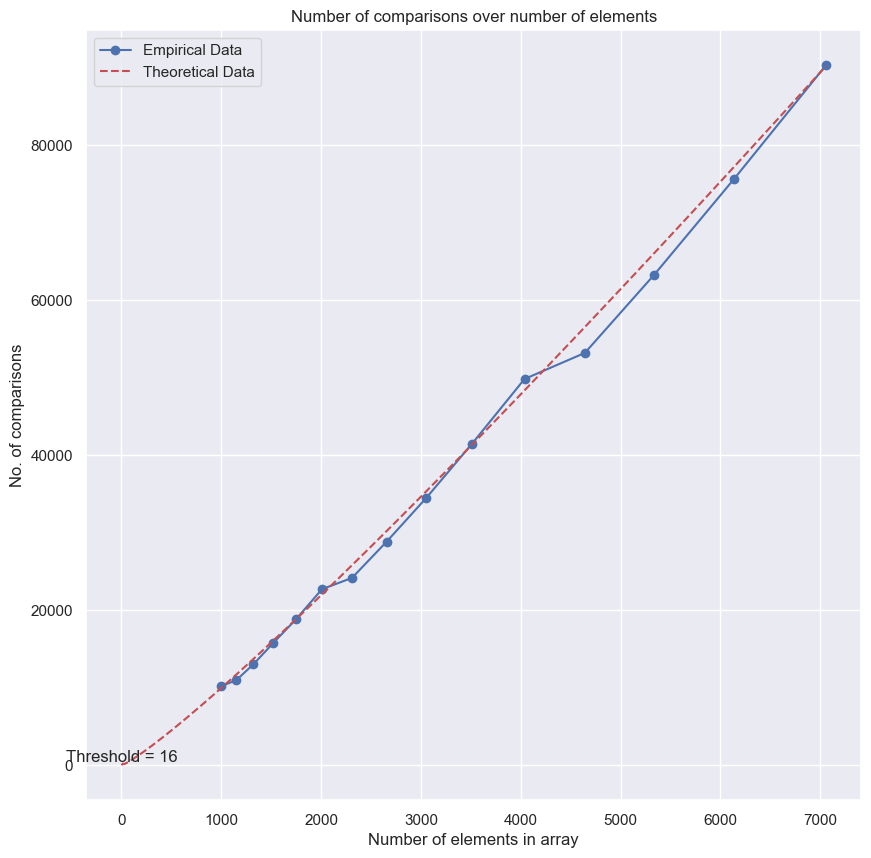

In [15]:
count = 0
x=[]
y=[]
boundary = 16

x_theoretical = np.linspace(0, list(random_datasets.keys())[-1], 500)

# Initialize y values
y_theoretical = np.zeros_like(x_theoretical)

# Define the conditions and compute y values
y_theoretical[x_theoretical < boundary] = x_theoretical[x_theoretical < boundary] ** 2
y_theoretical[x_theoretical >= boundary] = x_theoretical[x_theoretical >= boundary] * np.log2(x_theoretical[x_theoretical >= boundary])

#number of key comparisons
for i in random_datasets.keys():
    x.append(i)
    y.append(mergeSort(random_datasets[i], 0, len(random_datasets[i])-1, boundary))

# Create a figure and axis
plt.figure(figsize=(10,10))

# Plot the data

plt.plot(x, y, marker='o', linestyle='-', color='b', label='Empirical Data')

# Plot theoretical 
plt.plot(x_theoretical, y_theoretical, linestyle='--', color='r', label='Theoretical Data')


# Adding title and labels
plt.title('Number of comparisons over number of elements')
plt.xlabel('Number of elements in array')
plt.ylabel('No. of comparisons')
plt.text(0.2, 0.2, 'Threshold = ' + str(boundary), ha='center', va='bottom')




# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Fixed input size, ranging S

10
25
40
55
70
85


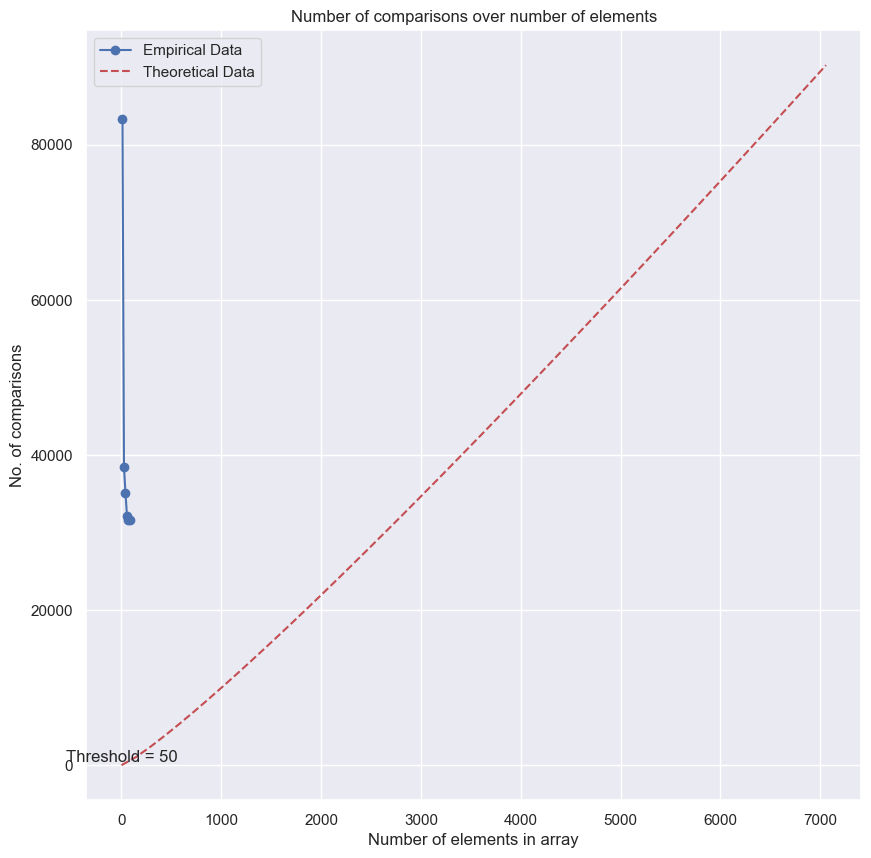

In [46]:
count = 0
x=[]
y=[]
boundary = 50
fixed_dataset = random_datasets[list(random_datasets.keys())[-1]]

x_theoretical = np.linspace(0, list(random_datasets.keys())[-1], 50)

# Initialize y values
y_theoretical = np.zeros_like(x_theoretical)

# Define the conditions and compute y values
y_theoretical[x_theoretical < 50] = x_theoretical[x_theoretical < 50] ** 2
y_theoretical[x_theoretical >= 50] = x_theoretical[x_theoretical >= 50] * np.log2(x_theoretical[x_theoretical >= 50])

#number of key comparisons
for i in range (10,100,15):
    print(i)
    x.append(i)
    y.append(mergeSort(fixed_dataset, 0, len(fixed_dataset)-1, i))
    

# Create a figure and axis
plt.figure(figsize=(10,10))

# Plot the data

plt.plot(x, y, marker='o', linestyle='-', color='b', label='Empirical Data')

# Plot theoretical 
plt.plot(x_theoretical, y_theoretical, linestyle='--', color='r', label='Theoretical Data')


# Adding title and labels
plt.title('Number of comparisons over number of elements')
plt.xlabel('Number of elements in array')
plt.ylabel('No. of comparisons')
plt.text(0.2, 0.2, 'Threshold = ' + str(boundary), ha='center', va='bottom')




# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()